# Imports

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import itertools
#import talib

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error

import xgboost as xgb
from sklearn.metrics import accuracy_score
import seaborn as sns
import operator
import warnings
warnings.filterwarnings("ignore")

plt.rc('figure', figsize=(20, 8), dpi=100)
from datetime import datetime

# Classes and Functions

Classes to train the regressor given data

In [0]:


class Plot:
    
    def __init__(self, data):
        self.data = data
        
    def autocorr(self, col, ticker):
        
        plot_acf(self.data[col], title = col + ' Autocorrelation Plot of ' + ticker)
        plt.show()
            
    def featureImportance(self, feature_importance, num_features, flag, ticker):
    
        f = dict()
        n = len(feature_importance)
        for i in range (n):
            f[X_test.columns[i]] = feature_importance[i]
        f = sorted(f.items(), key=operator.itemgetter(1), reverse=True)
        f = f[:num_features]
        feature_name = list()
        feature_values = list()
        for i, j in f:
            feature_name.append(i)
            feature_values.append(j)
        fig = plt.figure(figsize=(14,5))
        plt.xticks(rotation='vertical')
        plt.bar([i for i in range(len(f))], feature_values, tick_label=feature_name)
        if flag == 1:
            plt.title('Feature importance for EPS Prediction of ' + ticker + ' (Excluding Analyst estimate features)')
        else:
            plt.title('Feature importance for EPS Prediction of ' + ticker + ' (Including Analyst estimate features)')
        plt.show()
    
    def lossStatsAndCurve(self, X_test, Y_test, regressor, ticker):
        
        
        rmse = np.sqrt(mean_squared_error(Y_test, regressor.predict(X_test)))
        print("Root Mean Squared Error: %f" % (rmse))
        #print ("Regression Prediction Score: " + str(round(regressor.score(X_test,Y_test) * 100, 2)) + "%")
        eval_result = regressor.evals_result()
        training_rounds = range(len(eval_result['validation_0']['rmse']))
        plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
        plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
        plt.xlabel('Iterations')
        plt.ylabel('RMSE')
        plt.title('Training Vs Validation Error of ' + ticker)
        plt.legend()
        plt.show()

class Model:
    def __init__(self, X_train, Y_train, X_test, Y_test):
        
        self.X_train = X_train
        self.Y_train = Y_train
        self.X_test = X_test
        self.Y_test = Y_test
    
    def trainModel(self, epoch = 1000, verbose_flag = False, learning_rate = 0.01):
        
        regressor = xgb.XGBRegressor(colsample_bytree = 0.4, learning_rate = learning_rate, base_score=0.65, max_depth = 4, alpha = 10, n_estimators = epoch)
        xgbModel=regressor.fit(X_train, Y_train,eval_set = [(X_train, Y_train), (X_test, Y_test)], verbose = verbose_flag)
        return (xgbModel, regressor)
    

Functions to get data, either for all time or from beginning of time up until the specified date

In [0]:
def getData(data_temp, inc_analyst):
    
    data = data_temp.copy()
    Y = data['EPS (diluted)']
    
    del data['EPS (recurring)']
    del data['EPS (diluted)']
    
    if inc_analyst == False:
        #del data['Growth (YoY%)_Analyst']
        del data['EPS_Analyst']
    X = data
    
    train_samples = int(X.shape[0] * 0.75)
     
    X_train = X.iloc[:train_samples]
    X_test = X.iloc[train_samples:]

    Y_train = Y.iloc[:train_samples]
    Y_test = Y.iloc[train_samples:]
    
    
    return (X_train, Y_train), (X_test, Y_test)

def getDataUntilDate(data_temp, data_dates, startingDate, stoppingDate):
    data = data_temp.copy()
    Y = data['EPS (diluted)']
    
    del data['EPS (recurring)']
    del data['EPS (diluted)']
    
    X = data
    n = X.shape[0]
    for i in range(n):
        if (data_dates[i] > startingDate):
            beginIndex = i
            break
    
    lastIndex = beginIndex+1
    for i in range(beginIndex, n):
        if (data_dates[i] > stoppingDate):
            lastIndex = i
            break
        
    X_train = X.iloc[range(beginIndex,lastIndex)]
    Y_train = Y.iloc[range(beginIndex,lastIndex)]
    X_test = X.iloc[range(lastIndex, lastIndex+5)]
    Y_test = Y.iloc[range(lastIndex, lastIndex+5)]
        
    return (X_train, Y_train), (X_test, Y_test)

def getDataUntilDateforROA(data_temp, data_dates, startingDate, stoppingDate):
    data = data_temp.copy()
    Y = data['Return on Assets (%)']
    
    del data['Return on Assets (%)']
    #del data['EPS (diluted)']
    
    X = data
    n = X.shape[0]
    for i in range(n):
        if (data_dates[i] > startingDate):
            beginIndex = i
            break
    
    lastIndex = beginIndex+1
    for i in range(beginIndex, n):
        if (data_dates[i] > stoppingDate):
            lastIndex = i
            break
        
    X_train = X.iloc[range(beginIndex,lastIndex)]
    Y_train = Y.iloc[range(beginIndex,lastIndex)]
    X_test = X.iloc[range(lastIndex, lastIndex+5)]
    Y_test = Y.iloc[range(lastIndex, lastIndex+5)]
        
    return (X_train, Y_train), (X_test, Y_test)

def getDataUntilDateforROE(data_temp, data_dates, startingDate, stoppingDate):
    data = data_temp.copy()
    Y = data['Return on Equity (%)']
    
    del data['Return on Equity (%)']
    #del data['EPS (diluted)']
    
    X = data
    n = X.shape[0]
    for i in range(n):
        if (data_dates[i] > startingDate):
            beginIndex = i
            break
    
    lastIndex = beginIndex+1
    for i in range(beginIndex, n):
        if (data_dates[i] > stoppingDate):
            lastIndex = i
            break
        
    X_train = X.iloc[range(beginIndex,lastIndex)]
    Y_train = Y.iloc[range(beginIndex,lastIndex)]
    X_test = X.iloc[range(lastIndex, lastIndex+5)]
    Y_test = Y.iloc[range(lastIndex, lastIndex+5)]
        
    return (X_train, Y_train), (X_test, Y_test)

def getDataUntilDateforFCF(data_temp, data_dates, startingDate, stoppingDate):
    data = data_temp.copy()
    Y = data['Free Cash Flow per Share']
    
    del data['Free Cash Flow per Share']
    if 'Free Cash Flow Yield' in data.columns:
      del data['Free Cash Flow Yield']
    if 'Free Cash Flow_x' in data.columns:
      del data['Free Cash Flow_x']
    if 'Free Cash Flow_y' in data.columns:
      del data['Free Cash Flow_y']  
    
    
    X = data
    n = X.shape[0]
    for i in range(n):
        if (data_dates[i] > startingDate):
            beginIndex = i
            break
    
    lastIndex = beginIndex+1
    for i in range(beginIndex, n):
        if (data_dates[i] > stoppingDate):
            lastIndex = i
            break
        
    X_train = X.iloc[range(beginIndex,lastIndex)]
    Y_train = Y.iloc[range(beginIndex,lastIndex)]
    X_test = X.iloc[range(lastIndex, lastIndex+5)]
    Y_test = Y.iloc[range(lastIndex, lastIndex+5)]
        
    return (X_train, Y_train), (X_test, Y_test)



Functions to create portfolio weights, given the predicted EPS. The formulas and explanations / rationales of each flavor is outlined in the final report document. The functions createPortfolio1/2/3 correspond to flavor A,B,C in the report respectively. 

In [0]:
def createPortfolio1(predDf, dataset, datasetDates, long_only = False, exclude_citi = False):
    """
    predDf: a df each line representing date and prediction of different stocks on that certain date
    dataset: a list with each element a df of a stock
    datasetDates: a list with each element as the column 'Date' of each stock 
    return a df weight with first column as date and later columns as stocks. each element represents the proportion of 
    a certain stock in a certain date.
    """
    n = predDf.shape[0]#number of dates
    weightColumns = predDf.columns[1:]
    weightDf = pd.DataFrame(columns = weightColumns)
    k = len(weightColumns)

    for i in range(n):
        #loop over each date in the prediction dataframe
        currRow = predDf.iloc[i]
        currDate = currRow['Date']
        proportions = np.zeros(k-1)
        for j in range(1,k):
            #loop over each stock in ith date
            eps = currRow[weightColumns[j]]
            df = dataset[j-1]
            dfDates = datasetDates[j-1]
            for ii in range(len(dfDates)):
                if (dfDates[ii] > currDate):
                    foundIndex = ii
                    break
            
            if (foundIndex >= len(df)):
                foundIndex = len(df) - 1
            
            closePrice = df.iloc[foundIndex]['Close'] # for each stock in each date, find the close Price
            
            
            proportions[j-1] = eps / closePrice
            if (long_only and proportions[j-1] < 0):
                proportions[j-1] = 0
            if (exclude_citi and ((j-1) == ticker.index('Citigroup'))):
                proportions[j-1] = 0
        
        if (long_only and sum(proportions) == 0):
            proportions[:] = 1
        proportions = proportions / sum(proportions)
        weightDict = {}
        weightDict['Date'] = currDate
        for j in range(1,k):
            weightDict[weightColumns[j]] = proportions[j-1]
        #weightDict = {'Date': '2010-10-01', 'Apple':0.2, 'Amazon':0.1....}
        weightDf = weightDf.append(weightDict, ignore_index = True)
        
    return weightDf

def createPortfolio2(predDf, dataset, datasetDates, long_only = False, exclude_citi = False):
    n = predDf.shape[0]
    weightColumns = predDf.columns[1:]
    weightDf = pd.DataFrame(columns = weightColumns)
    k = len(weightColumns)

    for i in range(n):
        currRow = predDf.iloc[i]
        currDate = currRow['Date']
        proportions = np.zeros(k-1)
        for j in range(1,k):
            eps = currRow[weightColumns[j]]
            df = dataset[j-1]
            dfDates = datasetDates[j-1]
            for ii in range(len(dfDates)):
                if (dfDates[ii] > currDate):
                    foundIndex = ii
                    break
            if (foundIndex >= len(df)):
                foundIndex = len(df) - 1
            
            analyst = df.iloc[foundIndex].get('EPS_Analyst')
            if (analyst == None):
                proportions[j-1] = 0
            else:
                proportions[j-1] = (eps - analyst) / eps

            if (long_only and proportions[j-1] < 0):
                proportions[j-1] = 0
            if (exclude_citi and ((j-1) == ticker.index('Citigroup'))):
                proportions[j-1] = 0
        
        if (long_only and sum(proportions) == 0):
            proportions[:] = 1

        proportions = proportions / sum(proportions)
        weightDict = {}
        weightDict['Date'] = currDate
        for j in range(1,k):
            weightDict[weightColumns[j]] = proportions[j-1]
        
        weightDf = weightDf.append(weightDict, ignore_index = True)
        
    return weightDf

def createPortfolio3(predDf, dataset, datasetDates, long_only = False, exclude_citi = False):
    n = predDf.shape[0]
    weightColumns = predDf.columns[1:]
    weightDf = pd.DataFrame(columns = weightColumns)
    k = len(weightColumns)

    for i in range(n):
        currRow = predDf.iloc[i]
        currDate = currRow['Date']
        proportions = np.zeros(k-1)
        for j in range(1,k):
            eps = currRow[weightColumns[j]]
            df = dataset[j-1]
            dfDates = datasetDates[j-1]
            for ii in range(len(dfDates)):
                if (dfDates[ii] > currDate):
                    foundIndex = ii
                    break

            if (foundIndex >= len(df)):
                foundIndex = len(df) - 1

            startDateToConsider = datetime(currDate.year-1, currDate.month, 1)  
            for jj in range(len(dfDates)):
                if (dfDates[jj] > startDateToConsider):
                    startDateIndex = jj
                    break
            
            analyst = df.iloc[foundIndex].get('EPS_Analyst')
            if (analyst == None):
                proportions[j-1] = 0
            else:
                proportions[j-1] = (eps - analyst) / analyst

            if (long_only and proportions[j-1] < 0):
                proportions[j-1] = 0
            if (exclude_citi and ((j-1) == ticker.index('Citigroup'))):
                proportions[j-1] = 0
        
        if (long_only and sum(proportions) == 0):
            proportions[:] = 1
        proportions = proportions / sum(proportions)
        weightDict = {}
        weightDict['Date'] = currDate
        for j in range(1,k):
            weightDict[weightColumns[j]] = proportions[j-1]
        
        weightDf = weightDf.append(weightDict, ignore_index = True)
        
    return weightDf


def createPortfolio4(predDf, dataset, datasetDates, long_only = False, exclude_citi = False):
    n = predDf.shape[0]
    weightColumns = predDf.columns[1:]
    weightDf = pd.DataFrame(columns = weightColumns)
    k = len(weightColumns)

    for i in range(n):
        currRow = predDf.iloc[i]
        currDate = currRow['Date']
        proportions = np.zeros(k-1)
        for j in range(1,k):
            eps = currRow[weightColumns[j]]
            df = dataset[j-1]
            dfDates = datasetDates[j-1]
            for ii in range(len(dfDates)):
                if (dfDates[ii] > currDate):
                    foundIndex = ii
                    break
            
            if (foundIndex >= len(df)):
                foundIndex = len(df) - 1
            
            closePrice = df.iloc[foundIndex]['Close']
            
            if foundIndex < 365:
              indexof52high = df.iloc[:foundIndex]['Close'].idxmax()
            else:
              indexof52high = df.iloc[foundIndex-365:foundIndex]['Close'].idxmax()
            
            daysSince52high = foundIndex - indexof52high
            recencyRatio = (daysSince52high / 3650)
            #print("daysSince52high " + str(daysSince52high))
            proportions[j-1] = (eps / closePrice) - (recencyRatio)
            if (long_only and proportions[j-1] < 0):
                proportions[j-1] = 0
            if (exclude_citi and ((j-1) == ticker.index('Citigroup'))):
                proportions[j-1] = 0
        
        if (long_only and sum(proportions) == 0):
            proportions[:] = 1
        proportions = proportions / sum(proportions)
        weightDict = {}
        weightDict['Date'] = currDate
        for j in range(1,k):
            weightDict[weightColumns[j]] = proportions[j-1]
        
        weightDf = weightDf.append(weightDict, ignore_index = True)
        
    return weightDf

def createPortfolio5(predDf, dataset, datasetDates, long_only = False, exclude_citi = False):
    n = predDf.shape[0]
    weightColumns = predDf.columns[1:]
    weightDf = pd.DataFrame(columns = weightColumns)
    k = len(weightColumns)

    for i in range(n):
        currRow = predDf.iloc[i]
        currDate = currRow['Date']
        proportions = np.zeros(k-1)
        for j in range(1,k):
            eps = currRow[weightColumns[j]]
            df = dataset[j-1]
            dfDates = datasetDates[j-1]
            for ii in range(len(dfDates)):
                if (dfDates[ii] > currDate):
                    foundIndex = ii
                    break
            if (foundIndex >= len(df)):
                foundIndex = len(df) - 1
            
            if foundIndex < 365:
              indexof52high = df.iloc[:foundIndex]['Close'].idxmax()
            else:
              indexof52high = df.iloc[foundIndex-365:foundIndex]['Close'].idxmax()
            
            daysSince52high = foundIndex - indexof52high
            recencyRatio = (daysSince52high / 3650)
            #print("daysSince52high " + str(daysSince52high))

            analyst = df.iloc[foundIndex].get('EPS_Analyst')
            if (analyst == None):
                proportions[j-1] = 0
            else:
                proportions[j-1] = ((eps - analyst) / eps) - (recencyRatio)



            if (long_only and proportions[j-1] < 0):
                proportions[j-1] = 0
            if (exclude_citi and ((j-1) == ticker.index('Citigroup'))):
                proportions[j-1] = 0
        
        if (long_only and sum(proportions) == 0):
            proportions[:] = 1

        proportions = proportions / sum(proportions)
        weightDict = {}
        weightDict['Date'] = currDate
        for j in range(1,k):
            weightDict[weightColumns[j]] = proportions[j-1]
        
        weightDf = weightDf.append(weightDict, ignore_index = True)
        
    return weightDf

def createPortfolio6(predDf, dataset, datasetDates, long_only = False, exclude_citi = False):
    n = predDf.shape[0]
    weightColumns = predDf.columns[1:]
    weightDf = pd.DataFrame(columns = weightColumns)
    k = len(weightColumns)

    for i in range(n):
        currRow = predDf.iloc[i]
        currDate = currRow['Date']
        proportions = np.zeros(k-1)
        for j in range(1,k):
            eps = currRow[weightColumns[j]]
            df = dataset[j-1]
            dfDates = datasetDates[j-1]
            for ii in range(len(dfDates)):
                if (dfDates[ii] > currDate):
                    foundIndex = ii
                    break

            if (foundIndex >= len(df)):
                foundIndex = len(df) - 1

            startDateToConsider = datetime(currDate.year-1, currDate.month, 1)  
            for jj in range(len(dfDates)):
                if (dfDates[jj] > startDateToConsider):
                    startDateIndex = jj
                    break
           
            if foundIndex < 365:
              indexof52high = df.iloc[:foundIndex]['Close'].idxmax()
            else:
              indexof52high = df.iloc[foundIndex-365:foundIndex]['Close'].idxmax()
            
            daysSince52high = foundIndex - indexof52high
            recencyRatio = (daysSince52high / 3650)
            #print("daysSince52high " + str(daysSince52high))

            analyst = df.iloc[foundIndex].get('EPS_Analyst')
            if (analyst == None):
                proportions[j-1] = 0
            else:
                proportions[j-1] = ((eps - analyst) / analyst) - recencyRatio

            if (long_only and proportions[j-1] < 0):
                proportions[j-1] = 0
            if (exclude_citi and ((j-1) == ticker.index('Citigroup'))):
                proportions[j-1] = 0
        
        if (long_only and sum(proportions) == 0):
            proportions[:] = 1
        proportions = proportions / sum(proportions)
        weightDict = {}
        weightDict['Date'] = currDate
        for j in range(1,k):
            weightDict[weightColumns[j]] = proportions[j-1]
        
        weightDf = weightDf.append(weightDict, ignore_index = True)
        
    return weightDf

def createPortfolio7(predDf, predDfROA, predDfFCF, predDfROE, dataset, datasetDates, long_only = False, exclude_citi = False):
    n = predDf.shape[0]
    weightColumns = predDf.columns[1:]
    weightDf = pd.DataFrame(columns = weightColumns)
    k = len(weightColumns)

    for i in range(n):
        currRow = predDf.iloc[i]
        currRowROA = predDfROA.iloc[i]
        currRowFCF = predDfFCF.iloc[i]
        currRowROE = predDfROE.iloc[i]
        currDate = currRow['Date']
        proportions = np.zeros(k-1)
        for j in range(1,k):
            eps = currRow[weightColumns[j]]
            roa = currRowROA[weightColumns[j]]
            fcf = currRowFCF[weightColumns[j]]
            roe = currRowROE[weightColumns[j]]
            df = dataset[j-1]
            dfDates = datasetDates[j-1]
            for ii in range(len(dfDates)):
                if (dfDates[ii] > currDate):
                    foundIndex = ii
                    break
            
            if (foundIndex >= len(df)):
                foundIndex = len(df) - 1
            
            closePrice = df.iloc[foundIndex]['Close']
            
            if foundIndex < 365:
              indexof52high = df.iloc[:foundIndex]['Close'].idxmax()
              pastroa = df.iloc[:foundIndex]['Return on Assets (%)'].mean()
              pastfcf = df.iloc[:foundIndex]['Free Cash Flow per Share'].mean()
              pastroe = df.iloc[:foundIndex]['Return on Equity (%)'].mean()
            else:
              indexof52high = df.iloc[foundIndex-365:foundIndex]['Close'].idxmax()
              pastroa = df.iloc[foundIndex-365:foundIndex]['Return on Assets (%)'].mean()
              pastfcf = df.iloc[foundIndex-365:foundIndex]['Free Cash Flow per Share'].mean()
              pastroe = df.iloc[foundIndex-365:foundIndex]['Return on Equity (%)'].mean()

            daysSince52high = foundIndex - indexof52high
            recencyRatio = (daysSince52high / 3650)

            roaPoint = (roa - pastroa) / (10 * pastroa)
            fcfPoint = (fcf - pastfcf) / (10 * pastfcf)
            roePoint = (roe - pastroe) / (10 * pastroe)
            
            analyst = df.iloc[foundIndex].get('EPS_Analyst')
            if (analyst == None):
                proportions[j-1] = 0
            else:
                if ((eps - analyst) / analyst) < 0:
                  proportions[j-1] = ((eps - analyst) / analyst) - recencyRatio
                else:
                  proportions[j-1] = ((eps - analyst) / analyst) - recencyRatio + roaPoint + roePoint + fcfPoint
            if (long_only and proportions[j-1] < 0):
                proportions[j-1] = 0
            if (exclude_citi and ((j-1) == ticker.index('Citigroup'))):
                proportions[j-1] = 0
        
        if (long_only and sum(proportions) == 0):
            proportions[:] = 1
        proportions = proportions / sum(proportions)
        weightDict = {}
        weightDict['Date'] = currDate
        for j in range(1,k):
            weightDict[weightColumns[j]] = proportions[j-1]
        
        weightDf = weightDf.append(weightDict, ignore_index = True)
        
    return weightDf

Function to calculate returns and portfolio "NAVs" given the asset weights and asset prices.

In [0]:
def calcReturns(weights, dataset, datasetDates):
    """
    weights: a list with each element a dataframe returned by createportfolio
    dataset: a list with each element a df of a stock
    datasetDates: a list with each element as the column 'Date' of each stock 
    
    return a 2-d np.array with each line a date and each column a portfolio. elements in cells are prices.
    """
    #n means number of dates
    #m means different kinds of portfolio
    n = weights[0].shape[0]
    m = len(weights)
    weightColumns = weights[0].columns[2:]
    k = len(weightColumns)    

    prices = np.zeros([n,m])
    for j in range(m):
        prices[0,j] = 100
        
    for i in range(1,n):
        periodStartDate = weights[0].iloc[i-1].Date
        periodEndDate = weights[0].iloc[i].Date
        prch = np.zeros(k)
        
        for j in range(k):
            # find price change of asset j between periodStartDate and periodEndDate
            df = dataset[j]
            dfDates = datasetDates[j]
            for ii in range(len(dfDates)):
                if(dfDates[ii] >= periodStartDate):
                    startIndex = ii
                    break
            
            for ii in range(startIndex, len(dfDates)):
                if(dfDates[ii] >= periodEndDate):
                    endIndex = ii
                    break

            if (startIndex >= len(df)):
                startIndex = len(df) - 1
            if (endIndex >= len(df)):
                endIndex = len(df) - 1
                
            startPrice = df.iloc[startIndex]['Close']    
            endPrice = df.iloc[endIndex]['Close']
            prch[j] = (endPrice - startPrice) / startPrice
        
        for j in range(m):
            totalPrch = 0
            for jj in range(k):
                totalPrch = totalPrch + weights[j].iloc[i][weightColumns[jj]] * prch[jj]
            prevPrice = prices[i-1,j]
            nextPrice = prevPrice * (1+totalPrch)
            prices[i,j] = nextPrice
    
    return prices


In [0]:
def calcReturns_fee(weights, dataset, datasetDates, fee_rate = 0.001):
    """
    weights: dataframe returned by createportfolio
    dataset: a list with each element a df of a stock
    datasetDates: a list with each element as the column 'Date' of each stock 
    
    return a 2-d np.array with each line a date and each column a portfolio. elements in cells are prices.
    """
    #n means number of dates
    #m means different kind of portfolio
    n = weights[0].shape[0]
    m = len(weights)
    weightColumns = weights[0].columns[2:]
    k = len(weightColumns)    

    prices = np.zeros([n,m])
    fee = np.zeros([n,m])
    for j in range(m):
        prices[0,j] = 100
        fee[0,j] = prices[0,j]*fee_rate
        
    for i in range(1,n):
        periodStartDate = weights[0].iloc[i-1].Date
        periodEndDate = weights[0].iloc[i].Date
        prch = np.zeros(k)
        
        for j in range(k):
            # find price change of asset j between periodStartDate and periodEndDate
            df = dataset[j]
            dfDates = datasetDates[j]
            for ii in range(len(dfDates)):
                if(dfDates[ii] >= periodStartDate):
                    startIndex = ii
                    break
            
            for ii in range(startIndex, len(dfDates)):
                if(dfDates[ii] >= periodEndDate):
                    endIndex = ii
                    break

            if (startIndex >= len(df)):
                startIndex = len(df) - 1
            if (endIndex >= len(df)):
                endIndex = len(df) - 1
                
            startPrice = df.iloc[startIndex]['Close']    
            endPrice = df.iloc[endIndex]['Close']
            prch[j] = (endPrice - startPrice) / startPrice
        
        for j in range(m):
            #loop over different portfolios
            totalPrch = 0
            totalfee = 0
            for jj in range(k):
                totalPrch = totalPrch + weights[j].iloc[i][weightColumns[jj]] * prch[jj]
                totalfee = totalfee + abs(weights[j].iloc[i][weightColumns[jj]]-weights[j].iloc[i-1][weightColumns[jj]])*pr[jj]*fee_rate
            prevPrice = prices[i-1,j]
            nextPrice = prevPrice * (1+totalPrch)
            prices[i,j] = nextPrice
            fee[i,j] = totalfee
    
    return prices, fee


Function to calculate statistics (tracking error, alpha, information ratio) against the benchmark, given the prices of both our portfolio and benchmark index. It also plots the price movement over time.

In [0]:
def plotAgainstSP(prices, weight, spPrices, title = '', imageFile = ''):
    n = prices.shape[0]
    m = prices.shape[1]-1
    
    spCleanPrices = np.zeros(n)
    spCleanPrices[0] = 100
    
    relatives = np.zeros([n-1,m])
    absolutes = np.zeros([n-1,m])
    for i in range(1,n):
        endDate = weight.Date[i]
        startDate = weight.Date[i-1]
        for ii in range(len(spPrices.Date)):
            if(spPrices.Date[ii] >= startDate):
                startIndex = ii
                break
        for ii in range(startIndex,len(spPrices.Date)):
            if(spPrices.Date[ii] >= endDate):
                endIndex = ii
                break
        startSpPrice = spPrices.Price[startIndex]
        endSpPrice = spPrices.Price[endIndex]
        spPrch = (endSpPrice - startSpPrice) / startSpPrice
        spCleanPrices[i] = (spPrch + 1) * spCleanPrices[i-1]
        for j in range(m):
            start = prices.iloc[i-1][j]
            end = prices.iloc[i][j]
            prch = (end - start) / start
            relatives[i-1,j] = prch - spPrch
            absolutes[i-1,j] = prch
    
    # Calculate analytics
    trackingErrors = np.std(relatives,0)
    alphas = np.sum(relatives,0)
    ir = np.zeros(m)
    
    returns = np.sum(absolutes,0)
    vols = np.std(absolutes,0)
    sharpes = np.zeros(m)
    
    for j in range(m):
        ir[j] = alphas[j] / trackingErrors[j]
        sharpes[j] = returns[j] / vols[j]
    
    totalData = prices.copy()
    totalData['SP_Index'] = spCleanPrices
    totalData['Date'] = weight.Date
    plt.figure()
    labs = ["PrevGrp","ThisGrp"]
    for j in range(m):
        plt.plot( totalData.Date, totalData[j],label = labs[j])
    plt.plot(totalData.Date, totalData.SP_Index,label = 'SP')
    plt.title(title)
    plt.legend()
    plt.savefig(imageFile)
    
    print(title)
    print(ir)

    return relatives, absolutes, trackingErrors, alphas, ir, returns, vols, sharpes, spCleanPrices
    

In [0]:
def plotAgainstSP_fee(prices, weight, fee, spPrices, title = '', imageFile = ''):
    n = prices.shape[0]
    m = prices.shape[1]-1
    
    spCleanPrices = np.zeros(n)
    spCleanPrices[0] = 100
    
    relatives = np.zeros([n-1,m])
    absolutes = np.zeros([n-1,m])
    for i in range(1,n):
        endDate = weight.Date[i]
        startDate = weight.Date[i-1]
        for ii in range(len(spPrices.Date)):
            if(spPrices.Date[ii] >= startDate):
                startIndex = ii
                break
        for ii in range(startIndex,len(spPrices.Date)):
            if(spPrices.Date[ii] >= endDate):
                endIndex = ii
                break
        startSpPrice = spPrices.Price[startIndex]
        endSpPrice = spPrices.Price[endIndex]
        spPrch = (endSpPrice - startSpPrice) / startSpPrice
        spCleanPrices[i] = (spPrch + 1) * spCleanPrices[i-1]
        for j in range(m):
            start = prices.iloc[i-1][j]
            end = prices.iloc[i][j]
            cur_fee = fee.iloc[i][j]
            prch = (end - start - cur_fee) / start
            relatives[i-1,j] = prch - spPrch
            absolutes[i-1,j] = prch
    
    # Calculate analytics
    trackingErrors = np.std(relatives,0)
    alphas = np.sum(relatives,0)
    ir = np.zeros(m)
    
    returns = np.sum(absolutes,0)
    vols = np.std(absolutes,0)
    sharpes = np.zeros(m)
    
    for j in range(m):
        ir[j] = alphas[j] / trackingErrors[j]
        sharpes[j] = returns[j] / vols[j]
    
    totalData = prices.copy()
    totalData['SP_Index'] = spCleanPrices
    totalData['Date'] = weight.Date
    plt.figure()
    labs = ["PrevGrp1","PrevGrp2","PrevGrp3","wRR1","wRR2","wRR3","wPoints"]
    for j in range(m):
        plt.plot( totalData.Date, totalData[j],label = labs[j])
    plt.plot(totalData.Date, totalData.SP_Index,label = 'SP')
    plt.title(title)
    plt.legend()
    plt.savefig(imageFile)
    
    print(title)
    print(ir)

    return relatives, absolutes, trackingErrors, alphas, ir, returns, vols, sharpes, spCleanPrices

# Main Code

These are flags to control whether we want to redo prediction, construction, and simulation steps. They should all be True, but if you have run them previously and have the excel file saved, you can set some steps to False and just reuse the previously-computed Excel file to save time. 

The Excel files also help us investigate why certain portfolios are doing really well / really poorly etc, by finding out abnormally high weight percentage of a single asset, etc. 

In [0]:
doPrediction = False
doPortfolio1 = False
doPortfolio2 = False
doPortfolio3 = True
doPortfolio4 = False
doPortfolio5 = False
doPortfolio6 = False
doPortfolio7 = True
doPrices = True


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


*** Beginning Loop ***
Long Only: True
Exclude Citi: False
Financials: False
WellsFargo
Total dataset has 4968 days, and 268 features.
GoldmanSachs
Total dataset has 4986 days, and 356 features.
BankOfAmerica
Total dataset has 4968 days, and 239 features.
BerkshireHathaway
Total dataset has 4968 days, and 296 features.
Blackrock
Total dataset has 4715 days, and 271 features.
BNYMellon
Total dataset has 4968 days, and 241 features.
Citigroup
Total dataset has 4968 days, and 241 features.
JPMorgan
Total dataset has 4968 days, and 240 features.
MorganStanley
Total dataset has 4989 days, and 239 features.
Adobe
Total dataset has 4968 days, and 296 features.
Apple
Total dataset has 5032 days, and 301 features.
NVIDIA
Total dataset has 4970 days, and 301 features.
*** Beginning Prediction Phase ***
*** Beginning Construction Phase ***
*** Beginning Return Calc Phase ***
*** Beginning Analytics Phase ***
All Sectors  - Long Only - With Citi
[3.14394101 3.1375068 ]
*** Beginning Loop ***
Long 

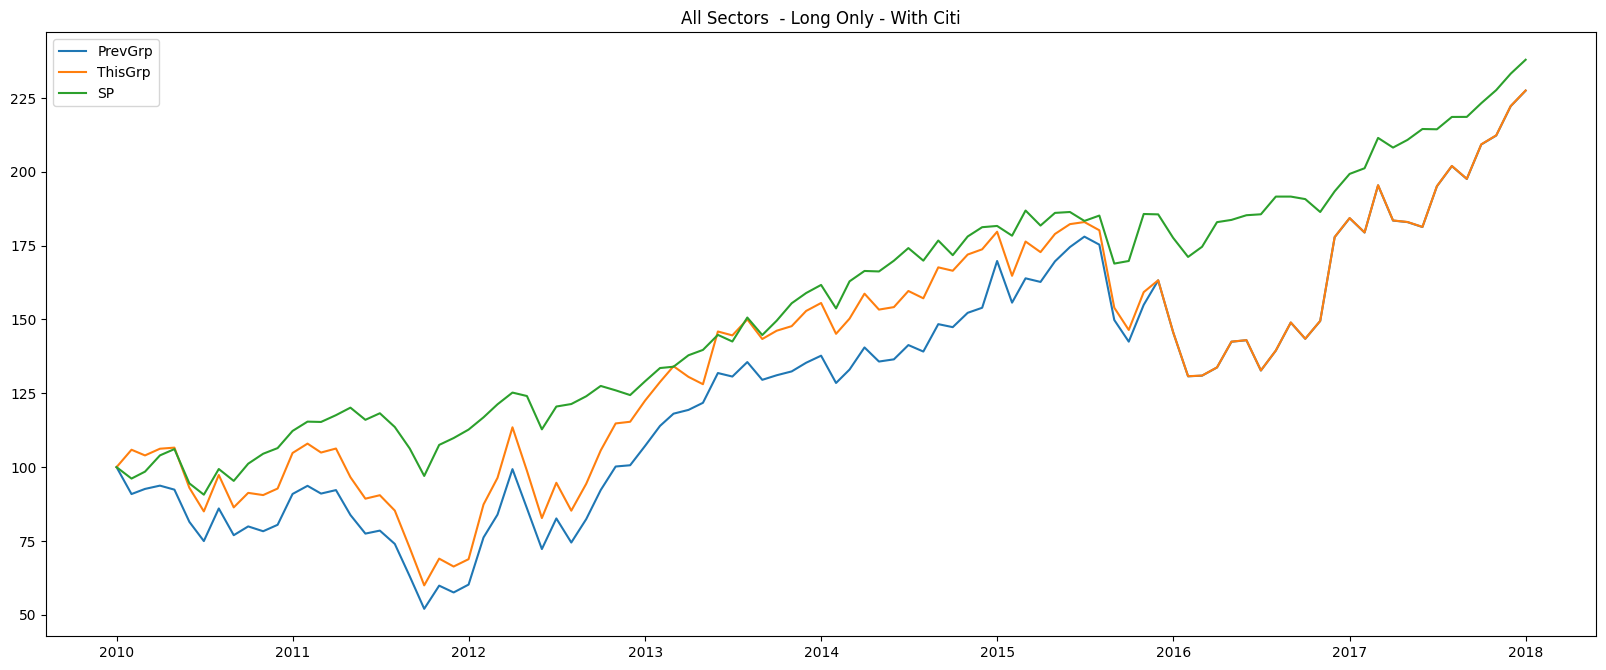

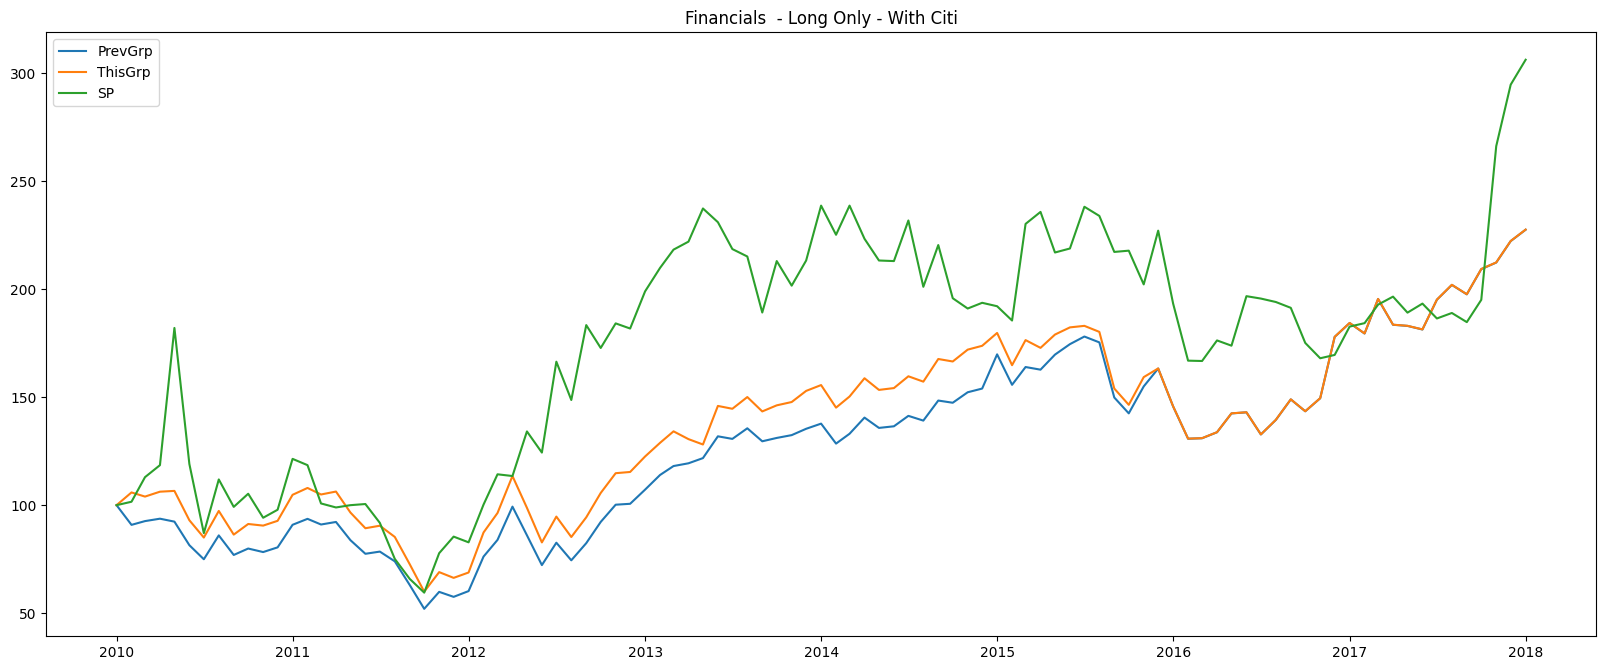

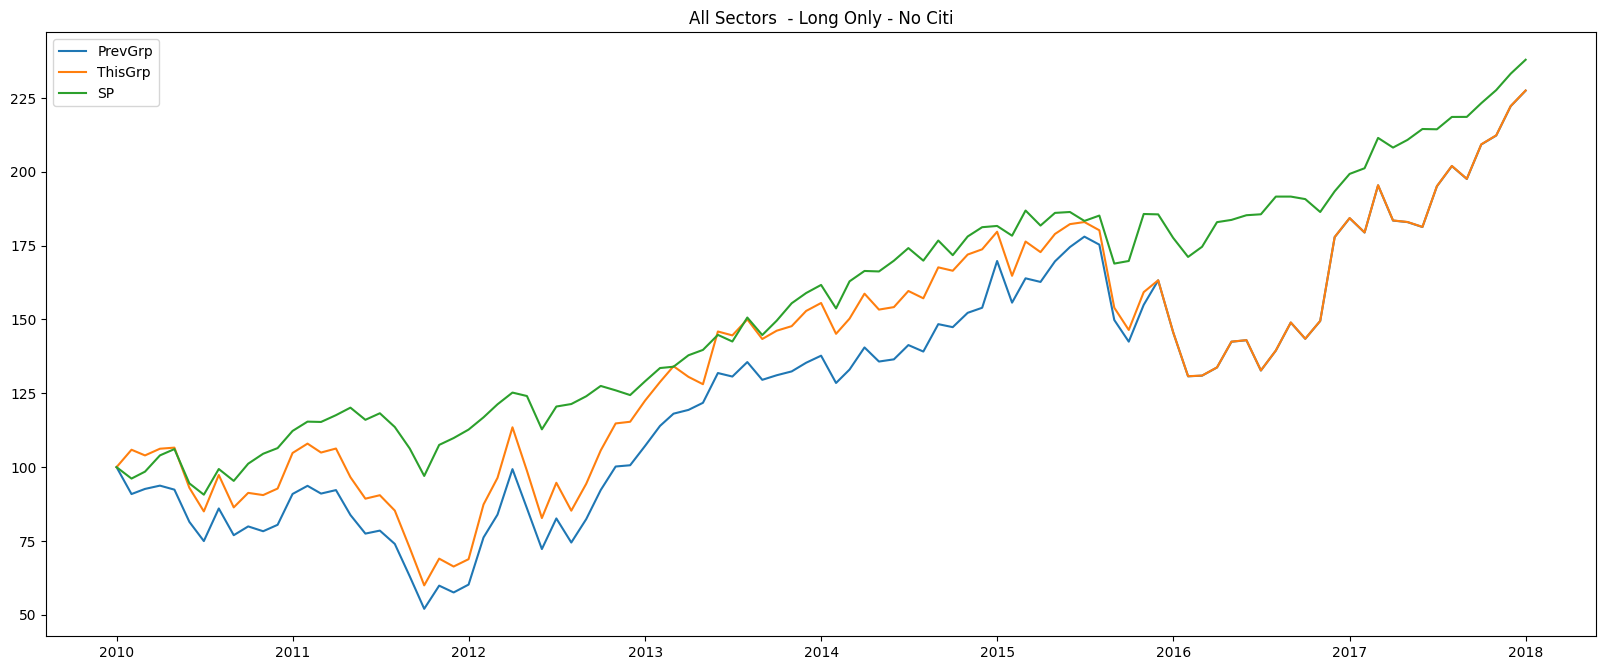

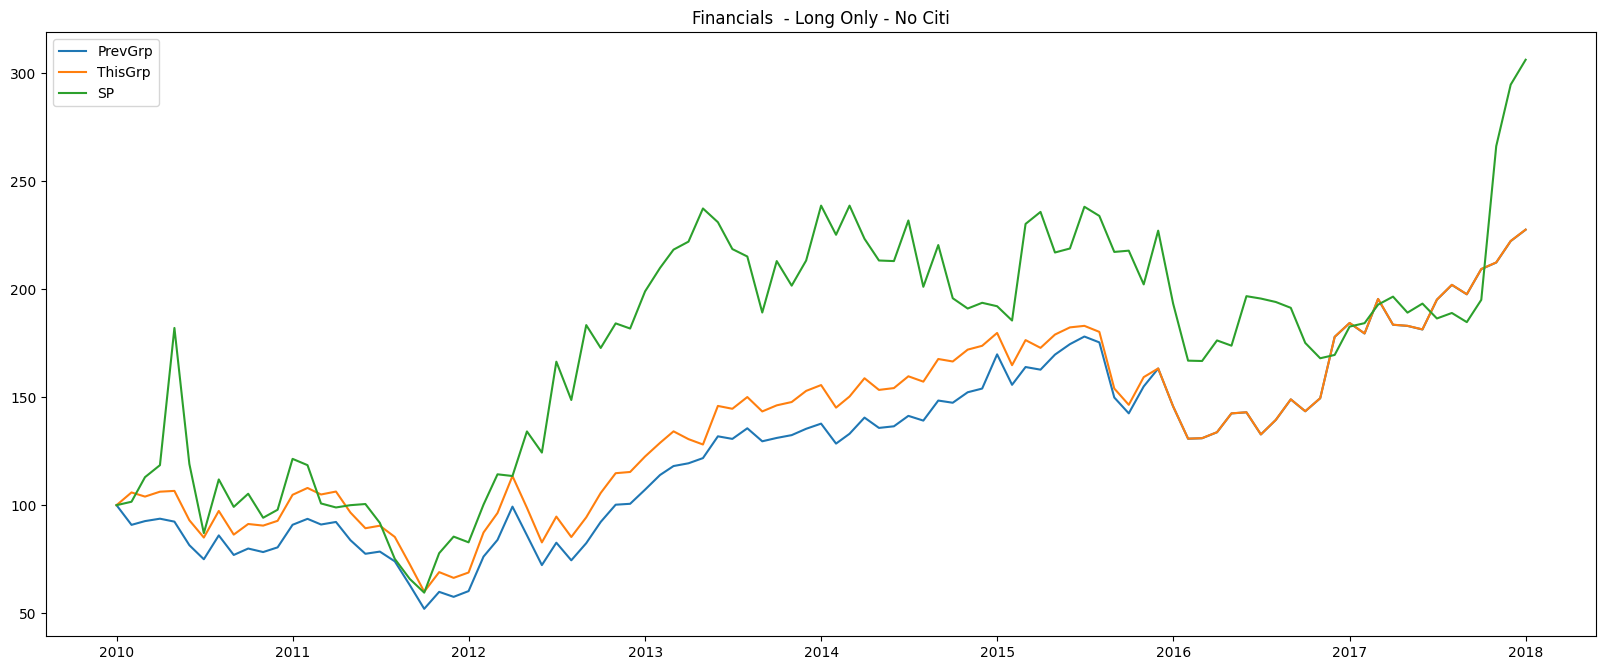

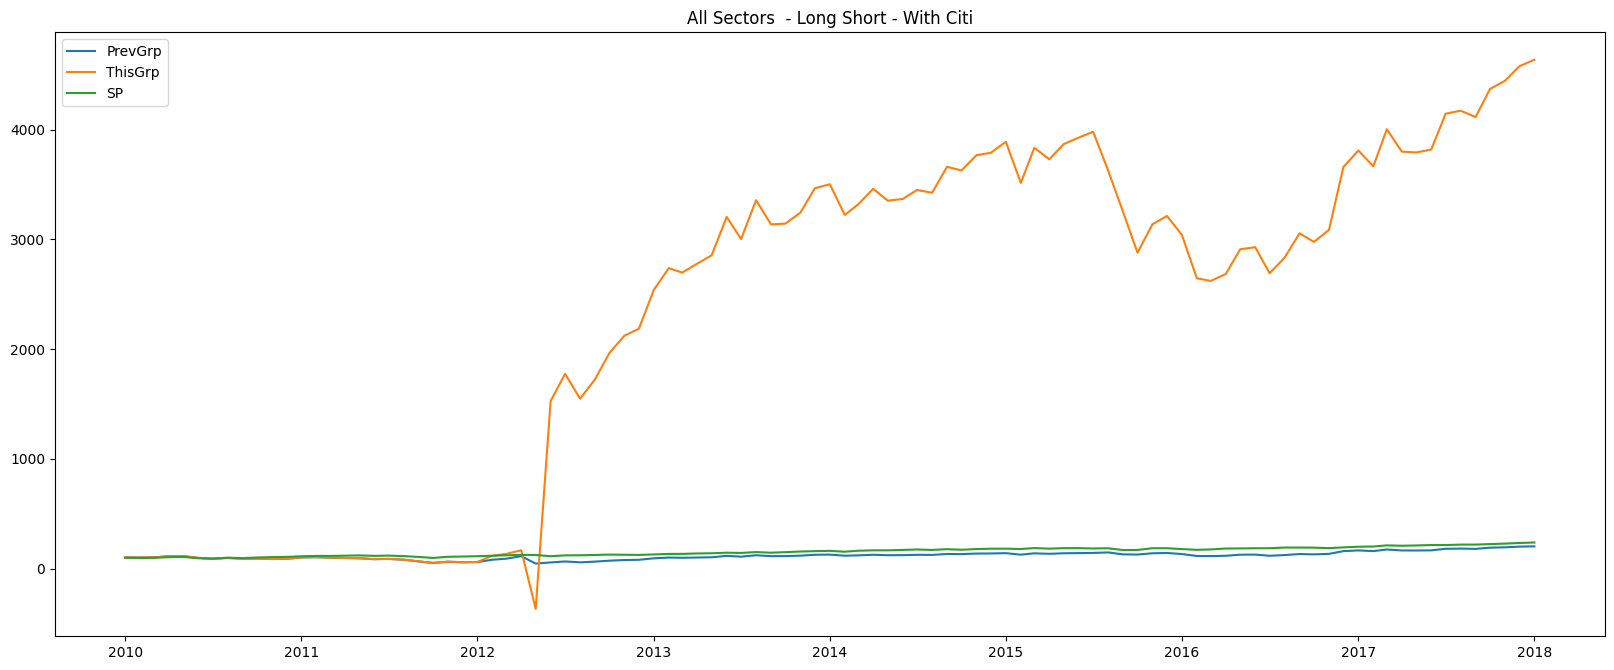

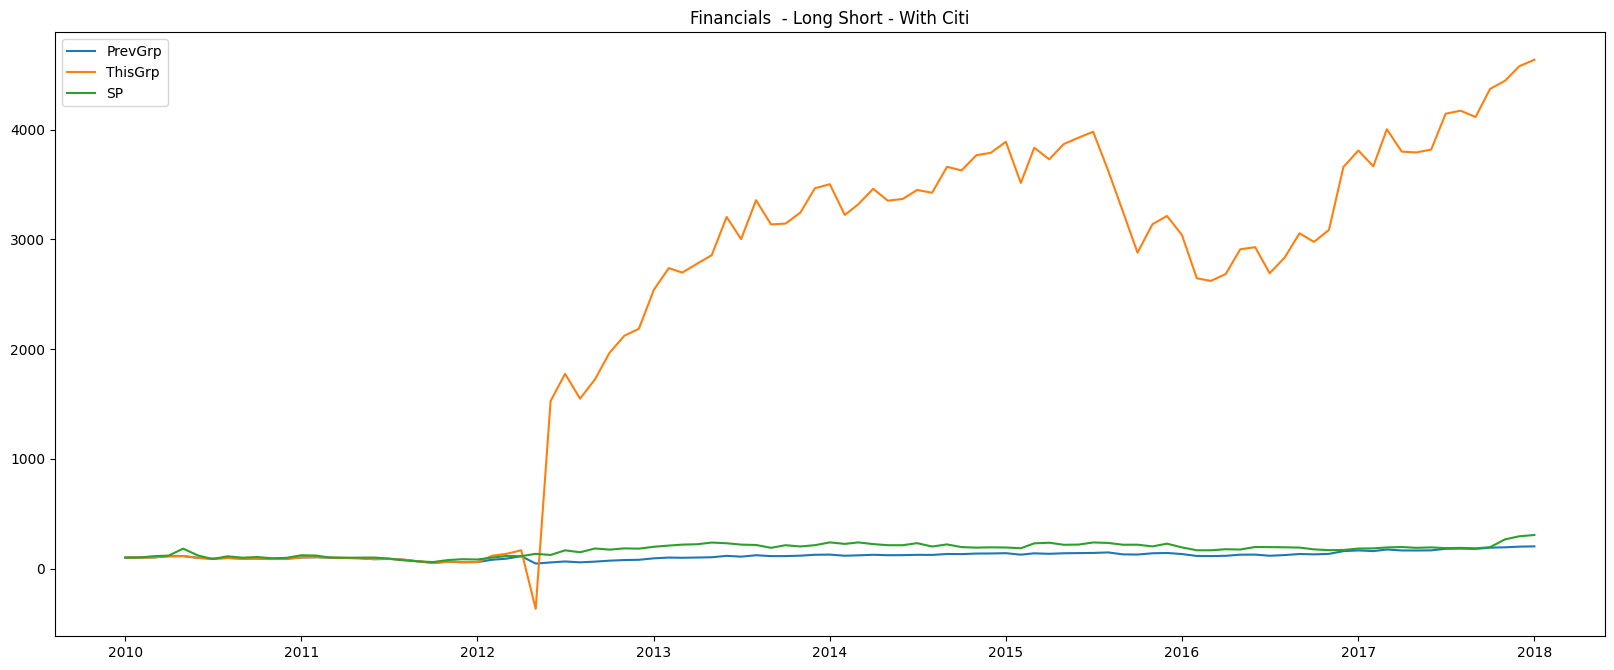

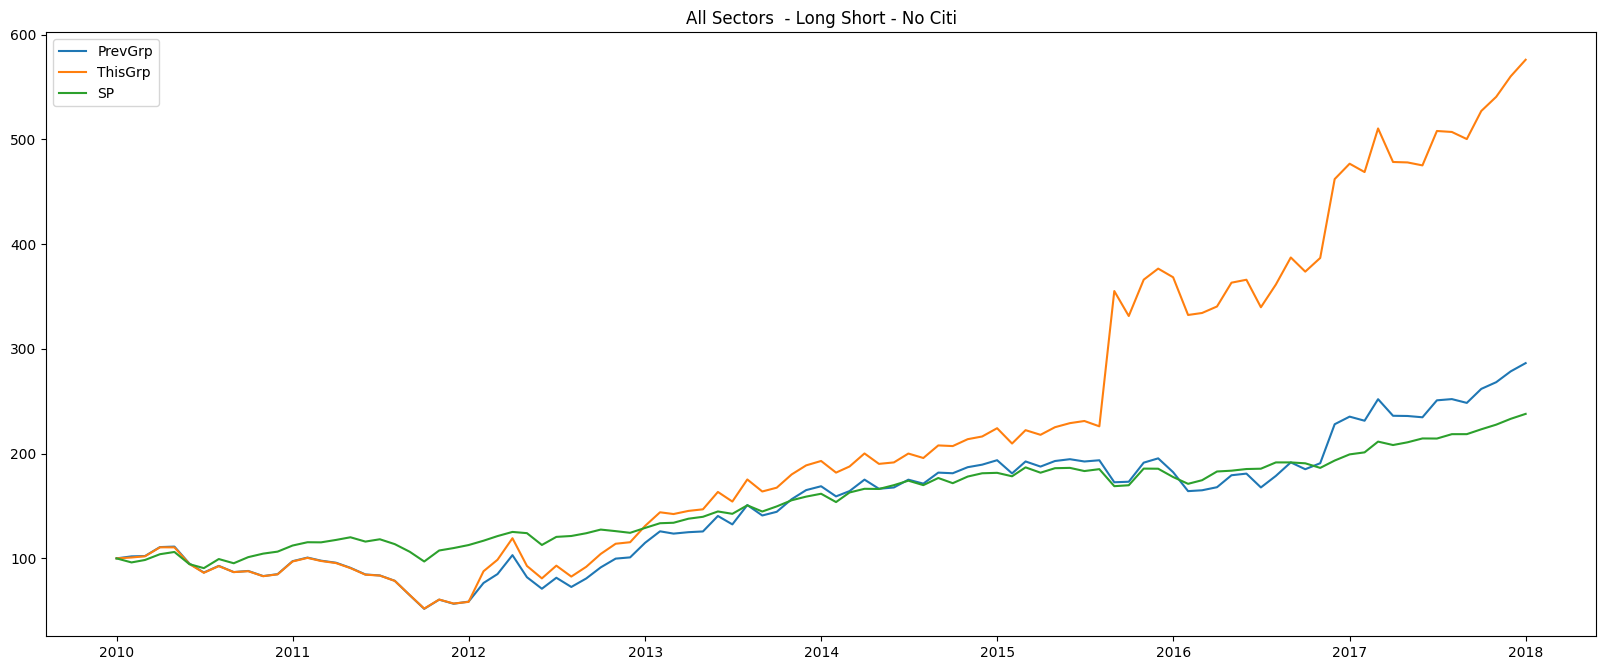

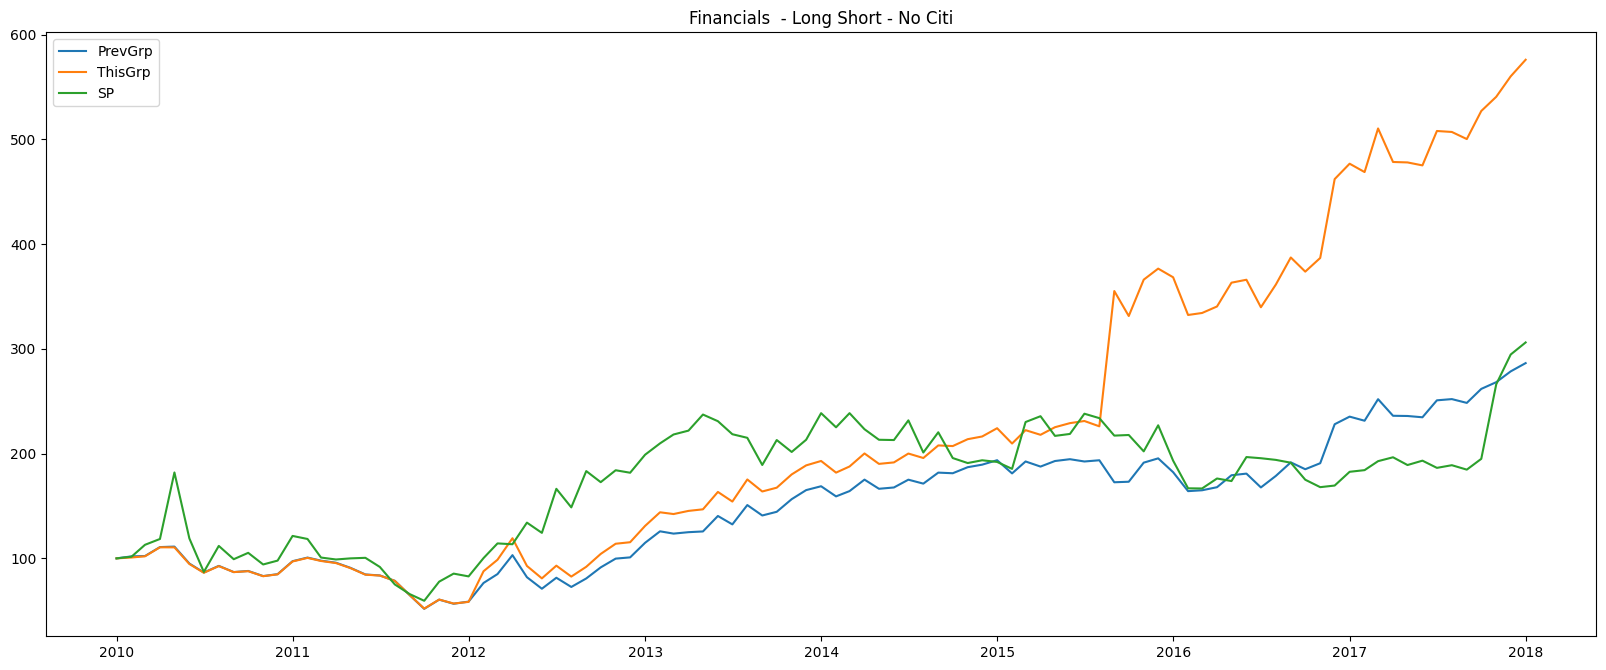

In [0]:

# MAIN code starts here
long_only_values = [True,False]
exclude_citi_values = [False,True]
financials_only = [False,True]
combos = list(itertools.product(long_only_values, exclude_citi_values, financials_only))

for c in range(len(combos)):
    print('*** Beginning Loop ***')
    
    combo = combos[c]
    long_only = combo[0]
    exclude_citi = combo[1]
    financials = combo[2]
    print('Long Only: ' + str(long_only))
    print('Exclude Citi: ' + str(exclude_citi))
    print('Financials: ' + str(financials))


    if (financials):    
        ticker = ['WellsFargo', 'GoldmanSachs', 'BankOfAmerica', 'BerkshireHathaway', 'Blackrock', 'BNYMellon', 'Citigroup', 'JPMorgan', 'MorganStanley']
    else:
        ticker = ['WellsFargo', 'GoldmanSachs', 'BankOfAmerica', 'BerkshireHathaway', 'Blackrock', 'BNYMellon', 'Citigroup', 'JPMorgan', 'MorganStanley','Adobe', 'Apple', 'NVIDIA']
    
    os.chdir("/content/drive/My Drive/FinalData")

    dataset = []
    for i in range(len(ticker)):
        df = pd.read_excel(ticker[i] + '_Final.xlsx')
        print(ticker[i])
        print('Total dataset has {} days, and {} features.'.format(df.shape[0], df.shape[1]))
        #a list with each element as a df of a single stock
        dataset.append(df)
    
    datasetDates = [] # a list with each element as the column 'Date' of each stock 
    
    for item in dataset:
        datasetDates.append(item['Date'])
        del item['Date']


    trainingStartDate = datetime(2004,1,1)
    portfolioStartDate = datetime(2010,1,1)
    
    if (financials):
        portfolioStopDate = datetime(2018,1,1)
    else:
        portfolioStopDate = datetime(2019,11,1)

    currDate = portfolioStartDate

    predColumns = ['Date']     #  a list with the first element as 'Date' and remaning element as names of stocks
    for i in range(len(ticker)):
        predColumns.append(ticker[i])
    predDf = pd.DataFrame(columns = predColumns) # a df each line representing date and prediction of different stocks on that certain date
    predDfROA = pd.DataFrame(columns = predColumns)
    predDfFCF = pd.DataFrame(columns = predColumns)
    predDfROE = pd.DataFrame(columns = predColumns)
    
    os.chdir("/content/drive/My Drive/Results_try")
    
    predFile = 'predictions.xlsx'
    predROAFile = 'predictionsROA.xlsx'
    predFCFFile = 'predictionsFCF.xlsx'
    predROEFile = 'predictionsROE.xlsx'
    print('*** Beginning Prediction Phase ***')
    if (doPrediction):
        retrain = False
        regressorDict = {}
        regressorDictROA = {}
        regressorDictFCF = {}
        regressorDictROE = {}
        while (currDate <= portfolioStopDate):
            print(currDate)
            currDateDict = {'Date': currDate} # this is for eps
            currDateDictROA = {'Date': currDate}
            currDateDictFCF = {'Date': currDate}
            currDateDictROE = {'Date': currDate}

            for i in range(len(dataset)):
                #loop over all stocks
                df = dataset[i]
                dfDates = datasetDates[i]
    
                (X_train, Y_train), (X_test, Y_test) = getDataUntilDate(df, dfDates, trainingStartDate, currDate)        
                
                if (retrain or (currDate == portfolioStartDate)):
                    m1 = Model(X_train, Y_train, X_test, Y_test)
                    xgbModel, regressor = m1.trainModel(verbose_flag=False)
                    regressorDict[i] = regressor
                else:
                    regressor = regressorDict[i]
                    
                prediction = np.average(regressor.predict(X_test))
                currDateDict[predColumns[i+1]] = prediction
            #currDateDict = {'Date': '2010-10-01', 'Apple':10, 'Amazon':20,....}
            predDf = predDf.append(currDateDict, ignore_index=True)

            for i in range(len(dataset)):
                df = dataset[i]
                dfDates = datasetDates[i]
    
                (X_train, Y_train), (X_test, Y_test) = getDataUntilDateforROA(df, dfDates, trainingStartDate, currDate)        
                
                if (retrain or (currDate == portfolioStartDate)):
                    m1 = Model(X_train, Y_train, X_test, Y_test)
                    xgbModel, regressor = m1.trainModel(verbose_flag=False)
                    regressorDictROA[i] = regressor
                else:
                    regressor = regressorDictROA[i]
                    
                prediction = np.average(regressor.predict(X_test))
                currDateDictROA[predColumns[i+1]] = prediction
                
            predDfROA = predDfROA.append(currDateDictROA, ignore_index=True)

            for i in range(len(dataset)):
                #print("In Dataset of " + str(ticker[i]))
                df = dataset[i]
                dfDates = datasetDates[i]
    
                (X_train, Y_train), (X_test, Y_test) = getDataUntilDateforFCF(df, dfDates, trainingStartDate, currDate)        
                
                if (retrain or (currDate == portfolioStartDate)):
                    m1 = Model(X_train, Y_train, X_test, Y_test)
                    xgbModel, regressor = m1.trainModel(verbose_flag=False)
                    regressorDictFCF[i] = regressor
                else:
                    regressor = regressorDictFCF[i]
                    
                prediction = np.average(regressor.predict(X_test))
                currDateDictFCF[predColumns[i+1]] = prediction
                
            predDfFCF = predDfFCF.append(currDateDictFCF, ignore_index=True)

            for i in range(len(dataset)):
                #print("In Dataset of " + str(ticker[i]))
                df = dataset[i]
                dfDates = datasetDates[i]
    
                (X_train, Y_train), (X_test, Y_test) = getDataUntilDateforROE(df, dfDates, trainingStartDate, currDate)        
                
                if (retrain or (currDate == portfolioStartDate)):
                    m1 = Model(X_train, Y_train, X_test, Y_test)
                    xgbModel, regressor = m1.trainModel(verbose_flag=False)
                    regressorDictROE[i] = regressor
                else:
                    regressor = regressorDictROE[i]
                    
                prediction = np.average(regressor.predict(X_test))
                currDateDictROE[predColumns[i+1]] = prediction
                
            predDfROE = predDfROE.append(currDateDictROE, ignore_index=True)

                
            if (currDate.month == 12):
                currDate = datetime(currDate.year+1, 1, 1)   
            else:
                currDate = datetime(currDate.year, currDate.month+1, 1)  
        
        predDf.to_excel(predFile)
        predDfROA.to_excel(predROAFile)
        predDfFCF.to_excel(predFCFFile)
        predDfROE.to_excel(predROEFile)

    predDf = pd.read_excel(predFile)
    predDfROA = pd.read_excel(predROAFile)
    predDfFCF = pd.read_excel(predFCFFile)
    predDfROE = pd.read_excel(predROEFile)  
    
    print('*** Beginning Construction Phase ***')
    
    combo = combos[c]
    long_only = combo[0]
    exclude_citi = combo[1]

    if(doPortfolio1):
      weight1File = 'weights1_' + str(long_only) + '_' + str(exclude_citi) + '_' + str(financials) + '.xlsx'
    if(doPortfolio2):
      weight2File = 'weights2_' + str(long_only) + '_' + str(exclude_citi) + '_' + str(financials) + '.xlsx'
    if(doPortfolio3):
      weight3File = 'weights3_' + str(long_only) + '_' + str(exclude_citi) + '_' + str(financials) + '.xlsx'
    if(doPortfolio4):
      weight4File = 'weights4_' + str(long_only) + '_' + str(exclude_citi) + '_' + str(financials) + '.xlsx'
    if(doPortfolio5):
      weight5File = 'weights5_' + str(long_only) + '_' + str(exclude_citi) + '_' + str(financials) + '.xlsx'
    if(doPortfolio6):
      weight6File = 'weights6_' + str(long_only) + '_' + str(exclude_citi) + '_' + str(financials) + '.xlsx'
    if(doPortfolio7):
      weight7File = 'weights7_' + str(long_only) + '_' + str(exclude_citi) + '_' + str(financials) + '.xlsx'
    imageFile = 'plot_' + str(long_only) + '_' + str(exclude_citi) + '_' + str(financials) + '.png'

    weights = []

    if (doPortfolio1):
        weight1Df = createPortfolio1(predDf, dataset, datasetDates, long_only = long_only, exclude_citi = exclude_citi)
        weight1Df.to_excel(weight1File)
        weight1Df = pd.read_excel(weight1File)
        weights.append(weight1Df)
        
    if (doPortfolio2):
        weight2Df = createPortfolio2(predDf, dataset, datasetDates, long_only = long_only, exclude_citi = exclude_citi)
        weight2Df.to_excel(weight2File)
        weight2Df = pd.read_excel(weight2File)
        weights.append(weight2Df)
        
    if (doPortfolio3):
        weight3Df = createPortfolio3(predDf, dataset, datasetDates, long_only = long_only, exclude_citi = exclude_citi)
        weight3Df.to_excel(weight3File)
        weight3Df = pd.read_excel(weight3File)
        weights.append(weight3Df)

    if (doPortfolio4):
        weight4Df = createPortfolio4(predDf, dataset, datasetDates, long_only = long_only, exclude_citi = exclude_citi)
        weight4Df.to_excel(weight4File)
        weight4Df = pd.read_excel(weight4File)
        weights.append(weight4Df)

    if (doPortfolio5):
        weight5Df = createPortfolio5(predDf, dataset, datasetDates, long_only = long_only, exclude_citi = exclude_citi)
        weight5Df.to_excel(weight5File)
        weight5Df = pd.read_excel(weight3File)
        weights.append(weight5Df)

    if (doPortfolio6):
        weight6Df = createPortfolio6(predDf, dataset, datasetDates, long_only = long_only, exclude_citi = exclude_citi)
        weight6Df.to_excel(weight6File)
        weight6Df = pd.read_excel(weight6File)
        weights.append(weight6Df)

    if (doPortfolio7):
        weight7Df = createPortfolio7(predDf, predDfROA, predDfFCF, predDfROE, dataset, datasetDates, long_only = long_only, exclude_citi = exclude_citi)
        weight7Df.to_excel(weight7File)
        weight7Df = pd.read_excel(weight7File)
        weights.append(weight7Df)
    
    

    print('*** Beginning Return Calc Phase ***')
    
    pricesFile = 'prices_' + str(long_only) + '_' + str(exclude_citi) + '_' + str(financials) + '.xlsx'
    if (doPrices):
        prices = calcReturns(weights, dataset, datasetDates)
        pd.DataFrame(prices).to_excel(pricesFile)
    prices = pd.read_excel(pricesFile)
    
    print('*** Beginning Analytics Phase ***')
    
    if (financials):
        spPrices = pd.read_excel('SPF prices.xls')
    else:
        spPrices = pd.read_excel('SPX prices.xls')
    
    title = ('Financials ' if financials else 'All Sectors ') + ' - '
    title = title + ('Long Only' if long_only else 'Long Short')
    title = title + ' - '
    title = title + ('No Citi' if exclude_citi else 'With Citi')
    
    relatives, absolutes, trackingErrors, alphas, ir, returns, vols, sharpes, spCleanPrices = \
        plotAgainstSP(prices, weights[0], spPrices, title = title, imageFile = imageFile)

